# **Bioinformatics Project - Computational Drug Discovery for Breast Cancer**

This is a real-life Data Science and Machine Learning Project and in this Project we have built machine learning models of **`Aromatase Inhibitors (Enzyme responsible for Breast Cancer)`** using ChEMBL bioactivity data.

**In Part 5 we have compared several ML Algorithms using `LazyPredict` for building Regression Model of Acromatase Inhibitors.**

## Install and Import Libraries

In [1]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [3]:
df = pd.read_csv('aromatase_02_bioactivity_data_3class_pIC50_1.csv')

In [4]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## Data Pre-Processing

In [5]:
X.shape

(2835, 881)

In [6]:
# Remove Low Variance Features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(2835, 151)

In [15]:
# Performing Data Split (80/20 Ratio)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Comparing ML Algorithms

In [20]:
# Selecting only the First 30 Regressors from the list of Regressors
lazypredict.Supervised.REGRESSORS = lazypredict.Supervised.REGRESSORS[:30]
lazypredict.Supervised.REGRESSORS

clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 30/30 [00:21<00:00,  1.42it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 30/30 [00:15<00:00,  1.96it/s]


In [21]:
# Performance table of train set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.67,0.69,0.77,2.91
DecisionTreeRegressor,0.67,0.69,0.77,0.07
ExtraTreeRegressor,0.67,0.69,0.77,0.06
ExtraTreesRegressor,0.67,0.69,0.77,3.16
BaggingRegressor,0.63,0.65,0.81,0.25
HistGradientBoostingRegressor,0.57,0.60,0.87,1.41
MLPRegressor,0.57,0.60,0.88,3.03
KNeighborsRegressor,0.47,0.51,0.97,0.18
NuSVR,0.44,0.48,0.99,0.79


In [22]:
# Performance table of test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.33,0.51,0.99,0.90
NuSVR,0.29,0.48,1.02,0.49
GradientBoostingRegressor,0.29,0.48,1.02,0.94
MLPRegressor,0.27,0.46,1.03,1.77
BaggingRegressor,0.23,0.44,1.06,0.24
KNeighborsRegressor,0.23,0.44,1.06,0.06
LassoCV,0.19,0.41,1.09,2.53
ElasticNetCV,0.19,0.40,1.09,2.61
BayesianRidge,0.18,0.40,1.09,0.07


## Data Visualization of Model Performance

### For **"predictions_train"**

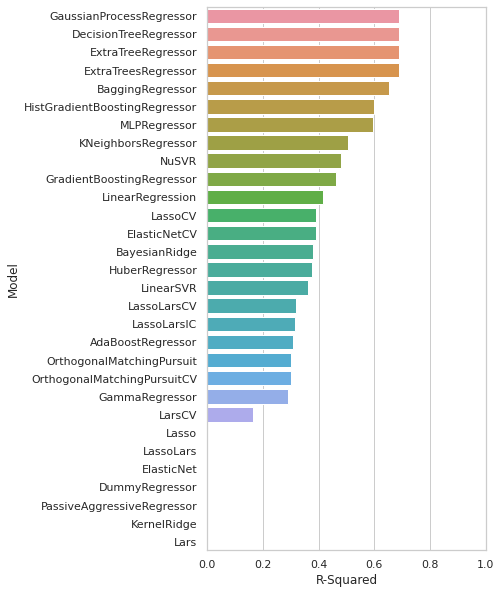

In [29]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))
plt.savefig('predictions_train_R_Squared.pdf')

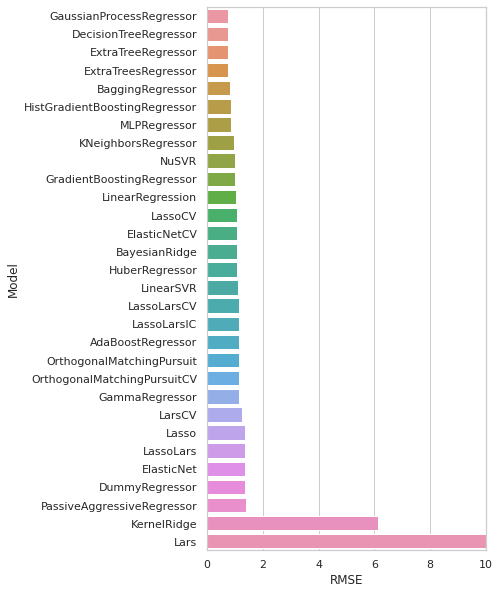

In [30]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))
plt.savefig('predictions_train_RMSE.pdf')

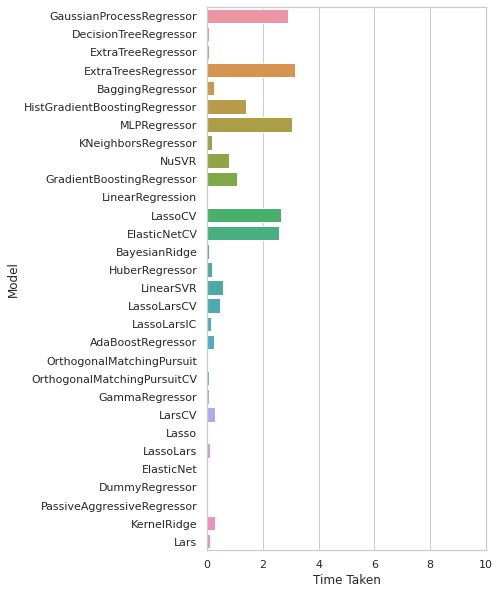

In [31]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))
plt.savefig('predictions_train_Calculation_Time.pdf')

For **"predictions_test"**

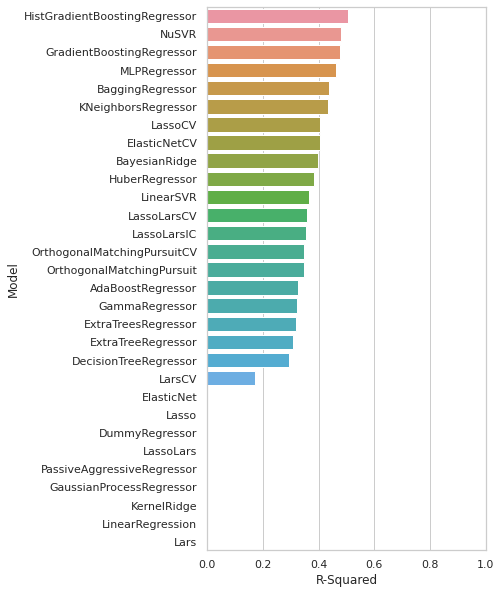

In [32]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test)
ax.set(xlim=(0, 1))
plt.savefig('predictions_test_R_Squared.pdf')

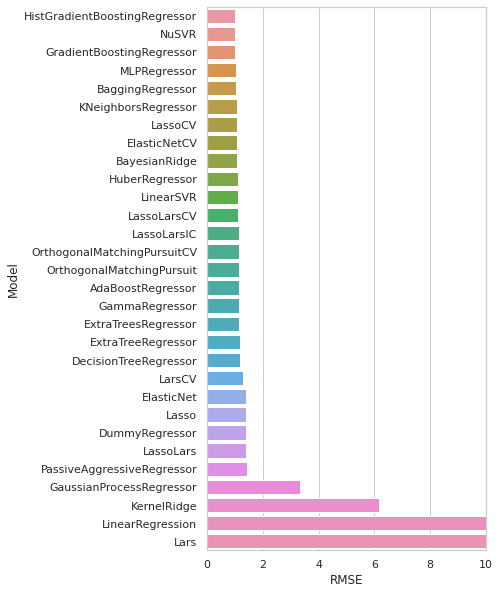

In [33]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="RMSE", data=predictions_test)
ax.set(xlim=(0, 10))
plt.savefig('predictions_test_RMSE.pdf')

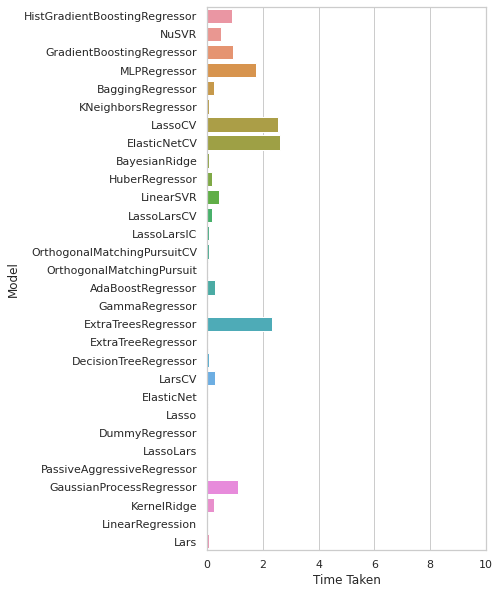

In [34]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="Time Taken", data=predictions_test)
ax.set(xlim=(0, 10))
plt.savefig('predictions_test_Calulation_Time.pdf')